In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Below is a definition of each column in dataset:

### **1. Identifiers**
- **id**: (Integer) Unique identifier for each patient.

### **2. Demographics**
- **age**: (Integer) Age of the patient in years.
- **sex**: (Categorical) Gender of the patient (male, female).
- **race**: (Categorical) Race of the patient (asian, black, hispanic, missing, other, white).
- **edu**: (Integer) Years of education.
- **income**: (Categorical) Income category ("under11k", "11−25k", "25−50k", ">50k").

### **3. Medical Conditions**
- **dzgroup**: (Categorical) Disease subcategory (e.g., ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, etc.).
- **dzclass**: (Categorical) Disease category (ARF/MOSF, COPD/CHF/Cirrhosis, Cancer, Coma).
- **num.co**: (Integer) Number of comorbidities (higher values indicate worse condition).
- **diabetes**: (Binary) Presence of diabetes (Y/N).
- **dementia**: (Binary) Presence of dementia (Y/N).
- **ca**: (Categorical) Cancer status (yes, metastatic, no).

### **4. Hospitalization & Treatment**
- **hday**: (Integer) Day in hospital at which the patient entered the study.
- **dnr**: (Categorical) Do Not Resuscitate (DNR) status (dnr after sadm, dnr before sadm, missing, no dnr).
- **dnrday**: (Integer) Day of DNR order (<0 if before study).
- **charges**: (Float) Hospital charges.
- **totcst**: (Float) Total ratio of costs to charges.
- **totmcst**: (Float) Total micro cost.
- **avtisst**: (Float) Average TISS score (Therapeutic Intervention Scoring System).

### **5. Physiological & Lab Measurements (Day 3)**
- **scoma**: (Float) Coma Score based on the Glasgow scale.
- **sps**: (Float) SUPPORT physiology score.
- **aps**: (Float) APACHE III day 3 physiology score.
- **meanbp**: (Float) Mean arterial blood pressure.
- **wblc**: (Float) White blood cell count (in thousands).
- **hrt**: (Integer) Heart rate.
- **resp**: (Integer) Respiration rate.
- **temp**: (Float) Temperature (Celsius).
- **pafi**: (Float) PaO2/FiO2 ratio.
- **alb**: (Float) Serum albumin levels.
- **bili**: (Float) Bilirubin levels.
- **crea**: (Float) Serum creatinine levels.
- **sod**: (Float) Serum sodium concentration.
- **ph**: (Float) Arterial blood pH.
- **glucose**: (Float) Blood glucose level.
- **bun**: (Float) Blood urea nitrogen level.
- **urine**: (Float) Urine output.

### **6. Functional & Survival Predictions**
- **adlp**: (Float) Activities of Daily Living (ADL) score (self-reported).
- **adls**: (Float) ADL score (reported by a surrogate, e.g., family member).
- **adlsc**: (Float) Imputed ADL Calibrated to Surrogate.
- **surv2m**: (Float) SUPPORT model 2-month survival estimate.
- **surv6m**: (Float) SUPPORT model 6-month survival estimate.
- **prg2m**: (Float) Physician’s 2-month survival estimate.
- **prg6m**: (Float) Physician’s 6-month survival estimate.

### **7. Target Variable**
- **death**: (Binary) Whether the patient died (1) or survived (0).



## 1. Data Understanding & Exploration

In [2]:
df = pd.read_csv('HealthRiskData\dataset.csv')
df.describe()

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
count,7284.000000,7284.000000,5969.000000,7283.000000,7.156000e+03,6575.000000,4506.000000,7218.000000,7283.000000,7283.000000,...,7284.000000,5468.000000,3691.000000,3816.000000,3407.000000,2768.000000,4988.000000,7284.000000,7284.000000,7284.000000
mean,62.651689,1.875206,11.718211,12.237539,6.005533e+04,30510.032023,28747.116082,22.581808,25.618397,37.704105,...,137.591708,7.415360,159.256028,32.397274,2192.288927,1.158237,1.624900,1.877531,0.682867,3641.500000
std,15.619063,1.347470,3.466423,24.696769,1.043454e+05,45044.530406,43679.696692,13.192527,9.962643,19.899105,...,6.003795,0.080656,87.876500,26.741968,1468.096769,1.731184,2.212638,1.987490,0.465392,2102.854013
min,18.118990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,1.199951,0.000000,...,112.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.767000,1.000000,10.000000,0.000000,9.821750e+03,5968.294950,5181.085940,12.000000,19.000000,23.000000,...,134.000000,7.379883,102.000000,14.000000,1165.000000,0.000000,0.000000,0.000000,0.000000,1820.750000
50%,64.882965,2.000000,12.000000,0.000000,2.535552e+04,14531.343800,13431.000000,19.666656,24.000000,35.000000,...,137.000000,7.419922,134.000000,23.000000,1950.000000,0.000000,1.000000,1.000000,1.000000,3641.500000
75%,74.089737,3.000000,14.000000,9.000000,6.433375e+04,35765.031300,34046.632850,31.500000,30.296875,49.000000,...,141.000000,7.469727,186.000000,42.000000,2995.000000,2.000000,3.000000,3.000000,1.000000,5462.250000
max,100.849000,8.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,78.000000,99.187500,143.000000,...,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,7283.000000


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,Id
0,44.32599,male,CHF,COPD/CHF/Cirrhosis,2,14.0,under $11k,0.0,44950.0,23775.2188,24613.29690,14.333328,black,32.398438,40.0,0.772949,0.637939,1,0,0,no,0.95,0.90,no dnr,15.0,73.0,4.899414,95.0,26.0,37.50000,NaN,2.099609,0.299988,2.599609,129.0,NaN,154.0,51.0,2650.0,0.0,0.0,0.00000,1,0
1,78.39600,male,COPD,COPD/CHF/Cirrhosis,2,14.0,$25-$50k,0.0,11293.0,8076.2969,7590.22656,15.500000,white,18.898438,43.0,0.763916,0.625000,1,0,0,yes,0.20,0.05,dnr after sadm,1.0,124.0,5.599609,114.0,24.0,36.59375,200.0000,3.799805,0.399963,1.199951,133.0,7.369141,NaN,NaN,NaN,NaN,NaN,3.44873,1,1
2,32.44098,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,11.0,NaN,37.0,1273347.0,633212.0000,NaN,38.500000,white,32.296875,44.0,0.569946,0.458984,58,0,0,no,0.30,0.30,no dnr,281.0,51.0,16.699219,96.0,30.0,37.39844,108.5625,2.399902,1.000000,0.699951,143.0,7.509766,NaN,NaN,NaN,NaN,7.0,7.00000,1,2
3,74.93994,male,ARF/MOSF w/Sepsis,ARF/MOSF,0,8.0,$11-$25k,9.0,48671.0,31515.9844,33310.15620,24.500000,white,25.398438,35.0,0.647949,0.547974,9,0,0,no,NaN,NaN,no dnr,9.0,79.0,12.099609,40.0,15.0,35.59375,355.0000,3.599609,0.799927,1.199951,137.0,7.399414,146.0,25.0,1000.0,NaN,0.0,0.00000,0,3
4,61.67599,male,Colon Cancer,Cancer,1,8.0,$11-$25k,0.0,2958.0,1935.3555,1559.00000,15.000000,black,34.398438,44.0,0.447998,0.136993,1,0,0,metastatic,0.00,0.00,no dnr,5.0,105.0,9.298828,135.0,6.0,35.79688,395.1875,NaN,5.199219,5.099609,137.0,7.469727,383.0,101.0,1040.0,NaN,7.0,7.00000,1,4


#### 1.1. Check The Shape of The Dataset

In [4]:
df.shape

(7284, 44)

#### 1.2. Checking Class Imbalance in Dataset

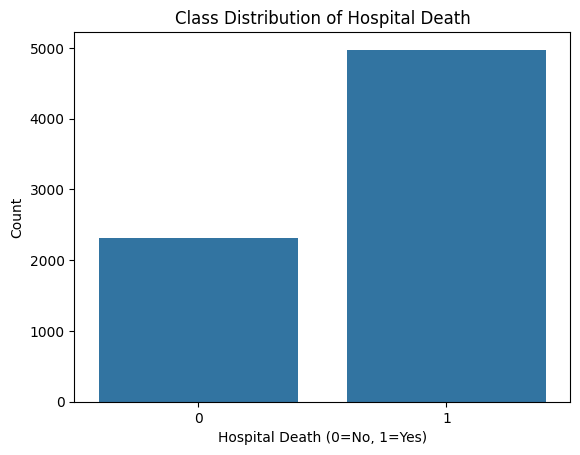

In [5]:
sns.countplot(x=df['death'])
plt.title("Class Distribution of Hospital Death")
plt.xlabel("Hospital Death (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


#### 1.3. Check Data Types

In [6]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:")
for col in categorical_cols: print(col, end=", ")

Categorical Columns:
sex, dzgroup, dzclass, income, race, ca, dnr, 

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns: ")

for col in numerical_cols: print(col, end=", ")


Numerical Columns: 
age, num.co, edu, scoma, charges, totcst, totmcst, avtisst, sps, aps, surv2m, surv6m, hday, diabetes, dementia, prg2m, prg6m, dnrday, meanbp, wblc, hrt, resp, temp, pafi, alb, bili, crea, sod, ph, glucose, bun, urine, adlp, adls, adlsc, death, Id, 

#### 1.4. Checking Missing values in Dataset

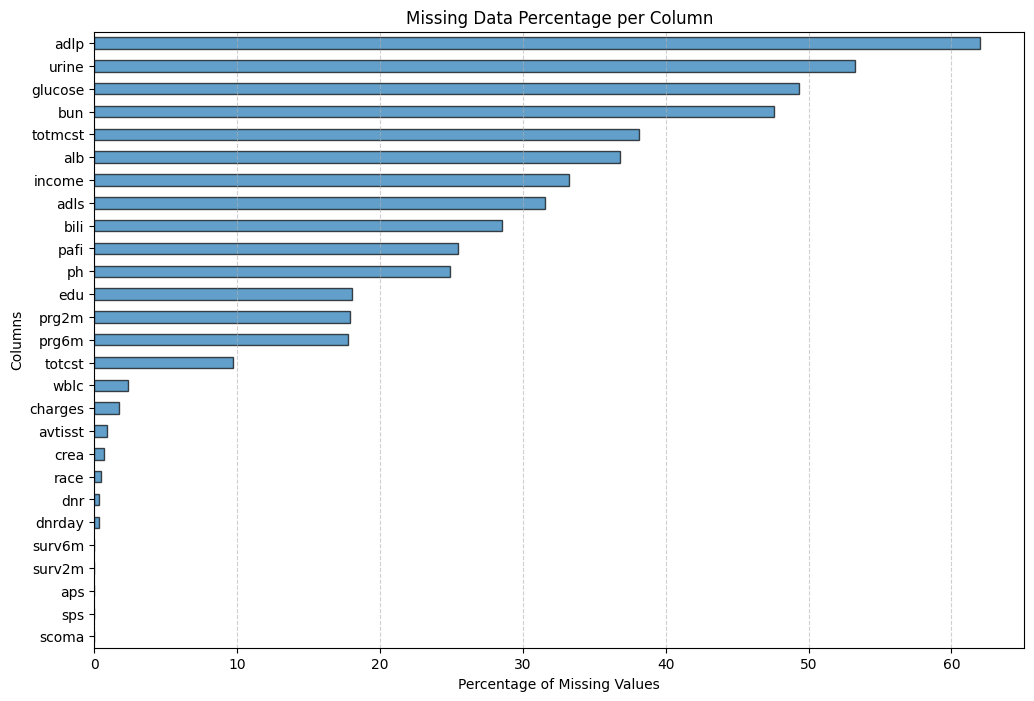

In [8]:

missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_columns = missing_percentage[missing_percentage > 0]


plt.figure(figsize=(12, 8))
missing_columns.sort_values().plot(kind='barh', edgecolor='black',alpha=0.7)
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Missing Data Percentage per Column')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show plot
plt.show()

In [9]:
missing_columns.sort_values()

scoma       0.013729
sps         0.013729
aps         0.013729
surv2m      0.013729
surv6m      0.013729
dnrday      0.343218
dnr         0.343218
race        0.453048
crea        0.686436
avtisst     0.906096
charges     1.757276
wblc        2.388797
totcst      9.733663
prg6m      17.737507
prg2m      17.915980
edu        18.053267
ph         24.931356
pafi       25.466776
bili       28.528281
adls       31.521142
income     33.209775
alb        36.834157
totmcst    38.138386
bun        47.611203
glucose    49.327293
urine      53.226249
adlp       61.998902
dtype: float64

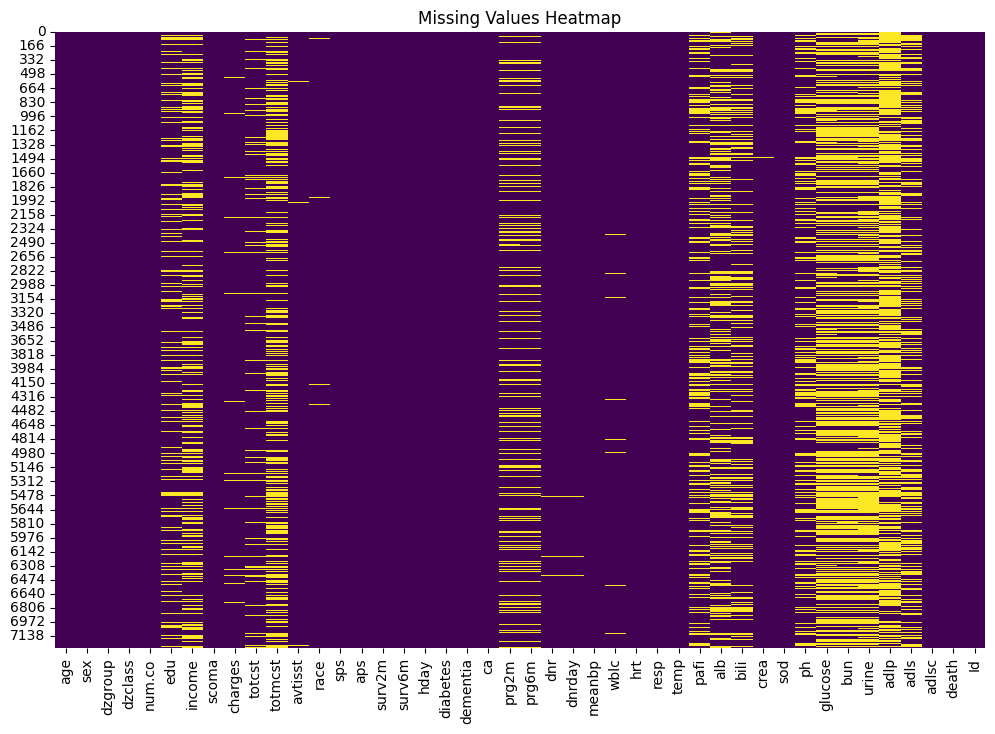

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

##### ***1.4.1 Merging `adlsc`, `adls`, and `adlp` features***
- Create a new column 'adl_final' based on priority:
- Use `adlsc` if available.
- If `adlsc` is missing, use `adlp`.
- If both are missing, use `adls`.

In [11]:
df['adl'] = df['adlsc'].fillna(df['adlp']).fillna(df['adls'])

df['adl'].isnull().sum()

0

##### ***1.4.2. Drop Columns (Too Many Missing or Low Importance)***
These features have too many missing values (>50%) and/or low correlation with survival:
- `urine` (53%) → Related to kidney function, but missing too much data.
- `adlp` (62%) → Already merged into adl_final, so we don't need it anymore.
- `income` (33%) → A categorical variable with many missing values, likely not highly predictive.
- `totmcst` (38%) → Low correlation with survival and hospital cost is not a patient-level indicator.

In [12]:
df.drop(columns=['adlp', 'adls', 'adlsc'], inplace=True)
df.drop(columns=['urine', 'income', 'totmcst'], inplace=True)


##### ***1.4.3. Drop Rows (A few Rows That Contain Missing Values In Specefied Columns)***
These features have very few missing values (<1%):

- `sps`     → 0.01%
- `aps`     → 0.01%
- `surv2m`  → 0.01%
- `surv6m`  → 0.01%
- `dnrday`  → 0.34%
- `dnr`     → 0.34%
- `race`    → 0.45%
- `crea`    → 0.68%



In [13]:
drop_columns = ['sps', 'aps', 'surv2m', 'surv6m', 'dnr', 'dnrday', 'race', 'crea']
df.dropna(subset=drop_columns,inplace=True)



##### ***1.4.4. Use ML-Based Imputation for Critical Features)***
Some features have predictive importance and should be filled using KNN imputation:

- `scoma` (Coma Score)
- `wblc` (White Blood Cell Count)
- `avtisst` (TISS Score - Intensive Care Score)


In [14]:
from sklearn.impute import KNNImputer

# Select numerical columns for KNN imputation
knn_columns = ['scoma', 'wblc', 'avtisst']
knn_imputer = KNNImputer(n_neighbors=5)
df[knn_columns] = knn_imputer.fit_transform(df[knn_columns])


##### ***1.4.5. Fill with Mean or Median (Based on Distribution)***
For numerical features that are moderately missing, we use:
- Mean (for normally distributed data) 
- Median (for skewed data) 



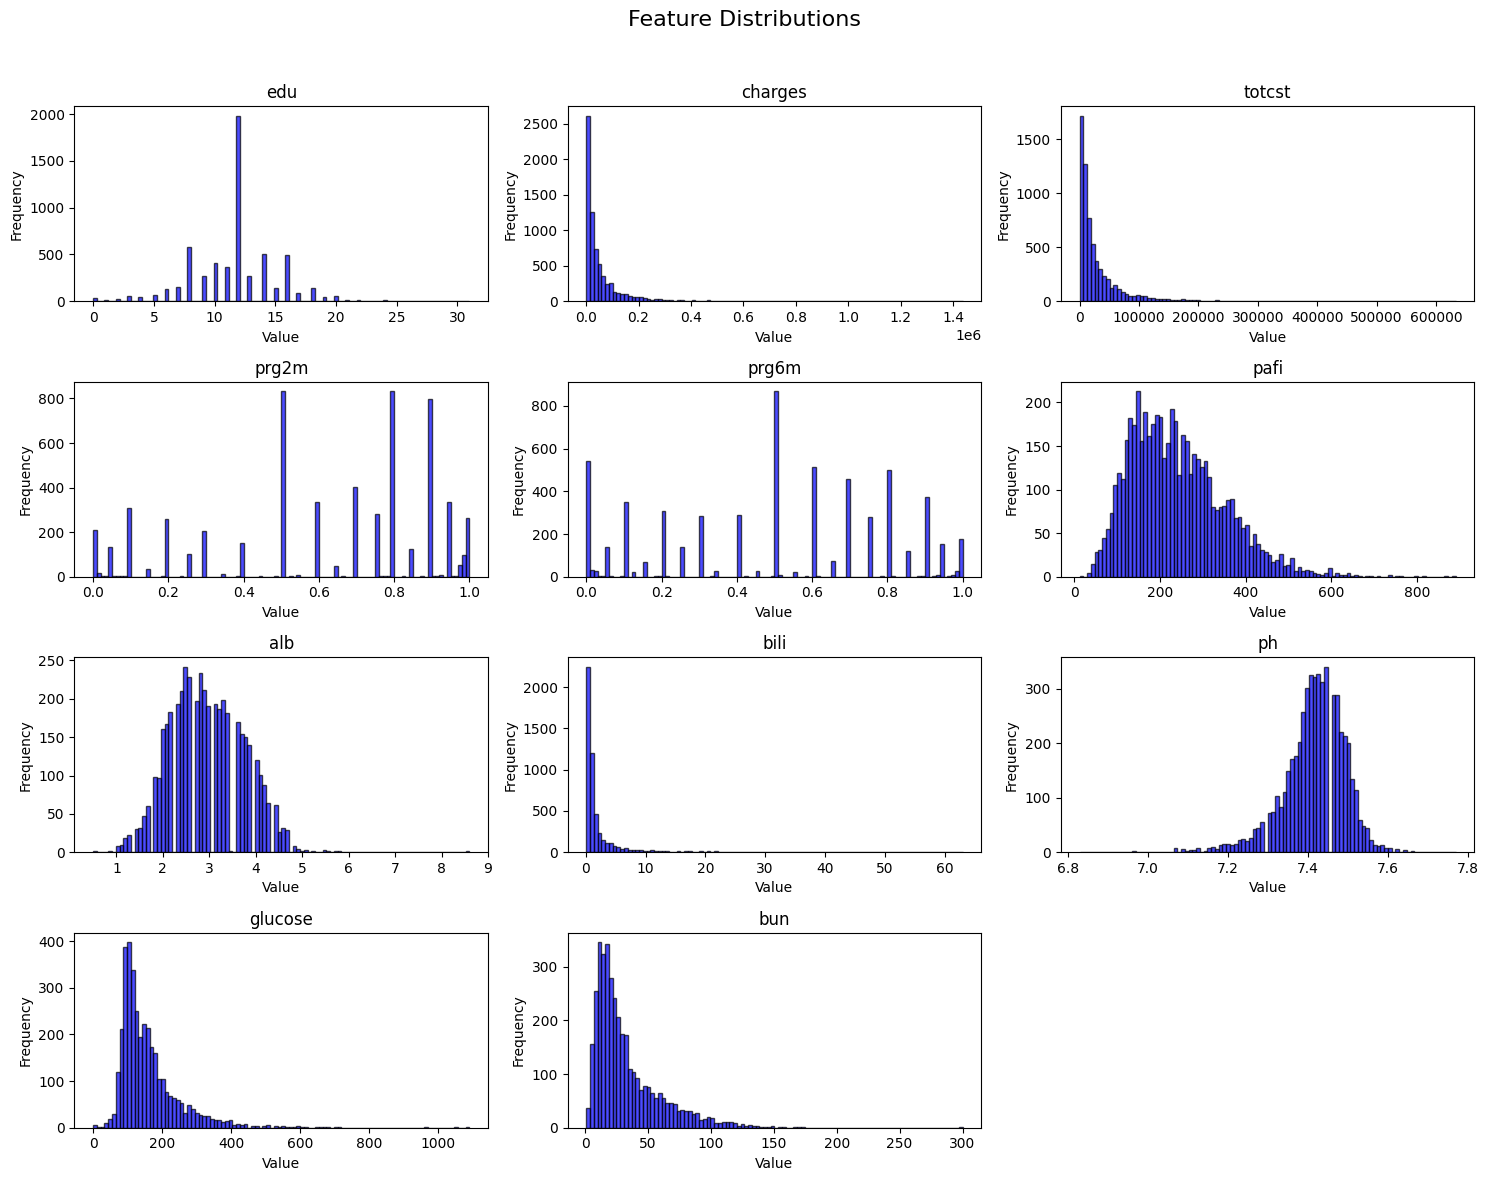

In [15]:

features = ['edu', 'charges', 'totcst','prg2m', 'prg6m', 'pafi', 'alb', 'bili', 'ph', 'glucose', 'bun']

# Define number of rows and columns for subplots (4x4 grid)
rows, cols = 4, 3

# Create a figure for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 12))
fig.suptitle("Feature Distributions", fontsize=16)

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    if feature in df.columns:
        axes[i].hist(df[feature].dropna(), bins=100, alpha=0.7, color='blue', edgecolor='black')
        axes[i].set_title(feature)
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [16]:
mean_fill = ['edu', 'pafi', 'alb', 'prg2m', 'prg6m']
for col in mean_fill:
    df[col].fillna(df[col].mean(), inplace=True)


C:\Users\taha_kms\AppData\Local\Temp\ipykernel_15164\2631640073.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [17]:
median_fill = ['charges', 'totcst', 'ph', 'bili', 'bun', 'glucose']
for col in median_fill:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\taha_kms\AppData\Local\Temp\ipykernel_15164\1744843527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\taha_kms\AppData\Local\Temp\ipykernel_15164\1744843527.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

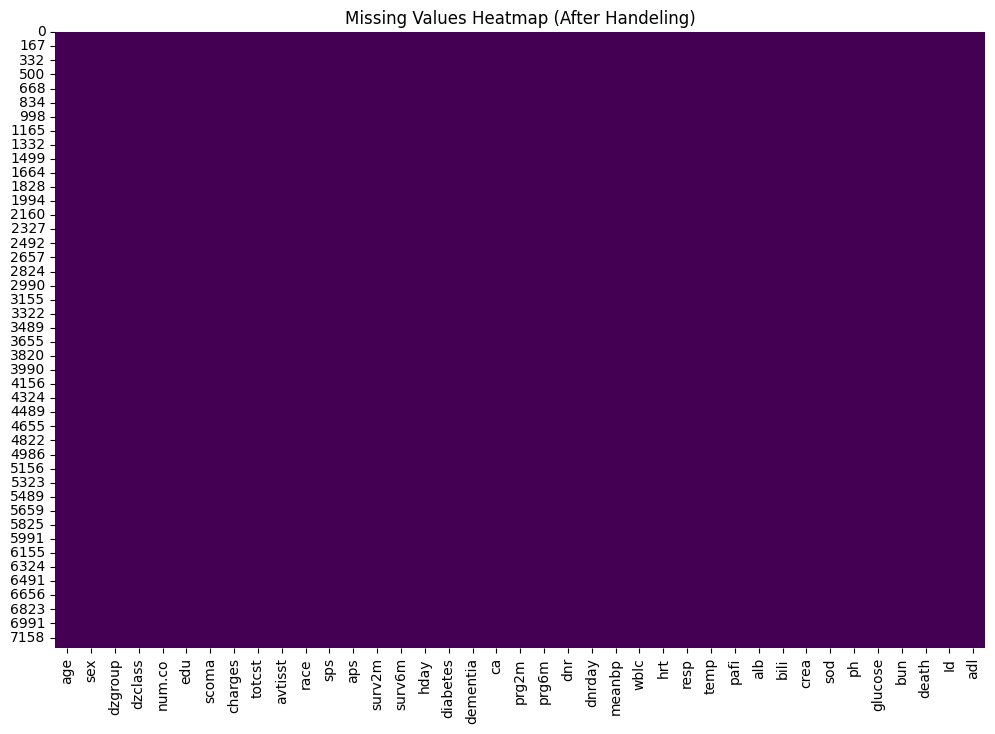

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap (After Handeling)")
plt.show()

#### 1.5. Check for Duplicate Rows

In [19]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


#### 1.6. Check for Constant Columns

In [20]:
constant_columns = df.nunique()[df.nunique() == 1]
print("Constant columns:", constant_columns)


Constant columns: Series([], dtype: int64)


#### 1.7. Categorical Feature Cardinality Check

In [21]:
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f"{col}: {df[col].nunique()} unique values")


sex: 2 unique values
dzgroup: 8 unique values
dzclass: 4 unique values
race: 5 unique values
ca: 3 unique values
dnr: 3 unique values


---
---
---

## 2. Preprocessing and Feature Extraction